In [2]:
import numpy as np
from keras.preprocessing import image
from tensorflow.python.keras.models import load_model, model_from_json
from tensorflow.python.keras.initializers import glorot_uniform
from keras.utils import CustomObjectScope
from keras import backend as K

Using TensorFlow backend.


In [3]:
import tensorflow

In [4]:
tensorflow.VERSION

AttributeError: module 'tensorflow' has no attribute 'VERSION'

In [5]:
dir(tensorflow)

['AggregationMethod',
 'Assert',
 'CriticalSection',
 'DType',
 'DeviceSpec',
 'GradientTape',
 'Graph',
 'IndexedSlices',
 'IndexedSlicesSpec',
 'Module',
 'Operation',
 'OptionalSpec',
 'RaggedTensor',
 'RaggedTensorSpec',
 'RegisterGradient',
 'SparseTensor',
 'SparseTensorSpec',
 'Tensor',
 'TensorArray',
 'TensorArraySpec',
 'TensorShape',
 'TensorSpec',
 'TypeSpec',
 'UnconnectedGradients',
 'Variable',
 'VariableAggregation',
 'VariableSynchronization',
 '_LazyLoader',
 '__builtins__',
 '__cached__',
 '__compiler_version__',
 '__cxx11_abi_flag__',
 '__doc__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__monolithic_build__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_absolute_import',
 '_api',
 '_division',
 '_forward_module',
 '_importlib',
 '_m',
 '_print_function',
 '_root_estimator',
 '_sys',
 '_top_level_modules',
 '_types',
 'abs',
 'acos',
 'acosh',
 'add',
 'add_n',
 'argmax',
 'argmin',
 'argsort',
 'as_dtype',
 'as_string',
 'asin',

In [6]:
model = 'model.json'
weights = 'weights_model.h5'

In [7]:
K.reset_uids()

In [8]:
with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
            with open(model, 'r') as f:
                model = model_from_json(f.read())
                model.load_weights(weights)

In [9]:
img = image.load_img('test_img/D1bS1 (1).jpg', target_size=(299, 299))

In [10]:
img = image.img_to_array(img)

In [11]:
img /= 255
img = np.expand_dims(img, axis=0)
print(img.shape)


(1, 299, 299, 3)


In [12]:
result = model.predict(img)

In [13]:
print(result)

[[2.4923773]]


In [14]:
result.flatten()[0]

2.4923773

In [15]:
def process_image(image_path):
    img = image.load_img(image_path, target_size=(299, 299))
    img = image.img_to_array(img)
    img /= 255
    img = np.expand_dims(img, axis=0)
    result = model.predict(img)
    print()
    print('=======================================')
    print('image path: {} have number of leafs: {}'.format(image_path,
                                                          result.flatten()[0]))
    print('=======================================') 
    

In [16]:
import os

In [17]:
mylist=os.listdir('test_img/')
len(mylist)

7

In [18]:
for i in os.listdir('test_img/'):
    process_image('test_img/'+i)


image path: test_img/D10bS1 (1).jpg have number of leafs: 6.658905506134033

image path: test_img/D4bS1 (1).jpg have number of leafs: 5.390771865844727

image path: test_img/D1bS1 (1).jpg have number of leafs: 2.492377281188965

image path: test_img/D16bS1 (1).jpg have number of leafs: 8.419461250305176

image path: test_img/D13bS1 (1).jpg have number of leafs: 6.436365604400635

image path: test_img/D7bS1 (1).jpg have number of leafs: 6.9492573738098145

image path: test_img/D19bS1 (1).jpg have number of leafs: 8.539482116699219


In [19]:
def transform_img_fn(path_list):
    out = []
   # cdef np.ndarray[double] vola = np.empty(7, dtype=float)
    for img_path in os.listdir('test_img/'):
        img = image.load_img('test_img/'+img_path, target_size=(299, 299))
        x = image.img_to_array(img) / 255
        x = np.expand_dims(x, axis=0)
        x = x.astype('double')
       # x = np.expand_dims(x, axis=1)
        out.append(x)
    return np.vstack(out)

check_image = transform_img_fn(os.listdir('test_img/'))

In [20]:
check_image[0].shape


(299, 299, 3)

In [21]:
from lime import lime_image
import time

In [22]:
explainer = lime_image.LimeImageExplainer()

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline


(299, 299, 3)


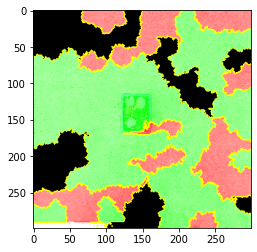

In [25]:
tmp = time.time()
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(check_image[0] , model.predict, top_labels=5, hide_color=0, num_samples=100)
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=50, hide_rest=True)
test = mark_boundaries(temp, mask)

print (test.shape)
from PIL import Image
img = Image.fromarray(check_image[1], 'RGB')
img.save('out.png')


plt.imshow(test)